In [2]:
import numpy as np
import theano as tt
import pymc3 as pm

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [3]:
with pm.Model() as model:
    parameter = pm.Exponential("poisson_param", 1.0)
    data_generator = pm.Poisson("data_generator", parameter)

In [ ]:
print( data_generator.random( size=10 ) )

In [ ]:
data_generator.tag.test_value

In [ ]:
pm.Bernoulli??

## Simulating Coin Flips
Note as the number of flips increases, the distribution converges toward 50%
<p>
<p>
    Two differnt mechanisms: using stats.bernoulli.rvs and then pymc3.Bernoulli

In [8]:
#Simulating coin flips with stats.bernoulli.rvs
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats

max_N = 2000
probs = []
for N in range(1, max_N+1 ):
    outcomes = stats.bernoulli.rvs(0.5, size = N)
    #print(outcomes)
    #print( outcomes.sum())
    probs.append(outcomes.sum() / N)
    
figsize(18, 8)
avg = [np.mean(probs)] * max_N
#print(np.mean(probs))

fig,ax = plt.subplots()
x = np.arange(max_N)

# Plot the data
data_line = ax.plot(x, probs, label='Data', marker='.')

# Plot the average line
mean_line = ax.plot(x, avg, label='Mean', linestyle='--', color='yellow')
#plt.plot(np.arange(1,max_N), probs)
plt.title("Coin flips - Mean = "+str(np.mean(probs)))
plt.xlim(0, max_N+1);
plt.ylim(0, 1.0)
plt.grid()

NameError: name 'np' is not defined

In [ ]:
#Simulating coin flips with pymc3 bernoulli model
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import pymc3 as pm

with pm.Model() as model:
    data_generator = pm.Bernoulli("data_generator", 0.5)
    
max_N = 2000
probs = []

for N in range(1, max_N+1 ):
    outcomes = data_generator.random( size=N )
    #print(outcomes)
    #print( outcomes.sum())
    probs.append(outcomes.sum() / N)
    
figsize(18, 8)
avg = [np.mean(probs)] * max_N
#print(np.mean(probs))

fig,ax = plt.subplots()
x = np.arange(max_N)

# Plot the data
data_line = ax.plot(x, probs, label='Data', marker='.')

# Plot the average line
mean_line = ax.plot(x, avg, label='Mean', linestyle='--', color='yellow')
#plt.plot(np.arange(1,max_N), probs)
plt.title("Coin flips - Mean = "+str(np.mean(probs)))
plt.xlim(0, max_N+1);
plt.ylim(0, 1)
plt.grid()

# Combinatorics: Binomial Coefficient, and Binomial Distribution
The **binomial coefficient** expresses the set of combinations "take k things from N possibilities":

$$ {{N}\choose{k}} = \frac {N!} {k!(N-k)!} $$

The **binomial distribution** expresses "what is the probability of getting exactly n successes in N Bernoulli trials".  The probability of a success in a **Bernoulli trial** is expressed as:
$$P(True) = p $$

the probability of a failure is the inverse:
$$P(False) = 1-p = q $$

The binomial distribution is espressed as:
$$P( k ) =  {{N}\choose{k}}  p^k(1-p)^{N-k}$$


In [ ]:
from scipy import special as s

In [ ]:
fact = s.factorial([10])
print(fact)

In [ ]:
# Take k things from N . possibilities

def num_combinations(N, k):
    return( s.factorial(N)/(s.factorial(k)*s.factorial(N-k)) )

In [ ]:
N=100
count=0
for n in range(1,7):
    count += num_combinations( N,n )
print( count )

In [ ]:
x = [1,2,3,4,5,6]
summ = sum( x)
print( summ )
prodd = np.prod(x)
print (prodd)

xx = np.arange(1,7)
print(xx.sum())
print(xx.prod())

In [2]:
import itertools as it
yy = [5, 7, 9]
print( list(it.combinations(yy,2)) )
print( list(it.combinations_with_replacement(yy,2)))

[(5, 7), (5, 9), (7, 9)]
[(5, 5), (5, 7), (5, 9), (7, 7), (7, 9), (9, 9)]


In [3]:
# The "how many ways to make change for $100" problem
bills = [20,20,20,10,10,10,10,10,5,5,1,1,1,1,1]
combos=[]
for n in range(1, len(bills)+1):
    for combination in it.combinations(bills, n):
        if sum(combination) == 100:
            combos.append(combination)
            
# convert to a set to eliminate duplicates
for change in set(combos):
    print( change )

(20, 20, 20, 10, 10, 10, 5, 5)
(20, 20, 20, 10, 10, 10, 5, 1, 1, 1, 1, 1)
(20, 20, 10, 10, 10, 10, 10, 5, 5)
(20, 20, 10, 10, 10, 10, 10, 5, 1, 1, 1, 1, 1)
(20, 20, 20, 10, 10, 10, 10)


In [ ]:
len(set(combos))

In [4]:
# Generalizing the question:
# How many different ways to make $100 given unlimited supply of fifties, 
# twenties, tens, fives, and ones
bills = [50, 20, 10, 5, 1]
makes_100 = []
count=0
for n in range(1, 101):
    for combination in it.combinations_with_replacement(bills, n):
        count+=1
        if sum(combination) == 100:
            makes_100.append(combination)
            

In [5]:
print( 'Out of {} possible combinations, there are {} that sum to $100'.format( count, len(makes_100) ))

Out of 96560645 possible combinations, there are 343 that sum to $100


In [ ]:
import operator
print( list(it.accumulate( bills, func=operator.mod )) )

In [ ]:
operator??

## Binomial Distribution: PMF

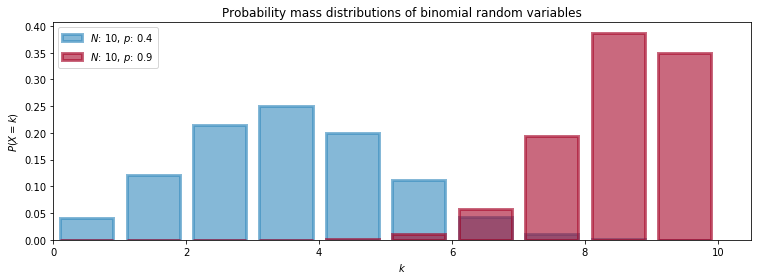

In [11]:
# That's "Probability Mass Function" in case you've fogrotten already ...
import numpy as np
figsize(12.5, 4)

import scipy.stats as stats
binomial = stats.binom

parameters = [(10, .4), (10, .9)]
colors = ["#348ABD", "#A60628"]

for i in range(2):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],
            edgecolor=colors[i],
            alpha=0.6,
            label="$N$: %d, $p$: %.1f" % (N, p),
            linewidth=3)

plt.legend(loc="upper left")
plt.xlim(0, 10.5)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Probability mass distributions of binomial random variables");

# Binomial Distribution: special case $N=1$
When $N=1$ the Binomial Distribution reduces to a Bernoulli Distribution

In [ ]:
N = 1
p = 0.5
parameters = [(1, .5)] #, (1, .9)]
colors = ["#348ABD", "#A60628"]

for i in np.arange(len(parameters)):
    N, p = parameters[i]
    _x = np.arange(N + 1)
    plt.bar(_x - 0.5, binomial.pmf(_x, N, p), color=colors[i],
    edgecolor=colors[i],
    alpha=0.6,
    label="$N$: %d, $p$: %.1f" % (N, p),
    linewidth=3)

plt.legend(loc="upper right")
plt.xlim(0, 10.5)
plt.xlabel("$k$")
plt.ylabel("$P(X = k)$")
plt.title("Probability mass distributions of coin flip");